- NER
- TF IDF
- we will use most common words to categorize the podcasts by topics we can also use semantics (negative, positive, neutral)
- lexical diversity

In [93]:
import re
import nltk
from nltk.corpus import stopwords
from camel_tools.tokenizers.word import simple_word_tokenize
import os
import nltk
from nltk.util import ngrams
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\youss\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\youss\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [94]:
def read_transcripts(channel_name, base_path):
    channel_path = os.path.join(base_path, channel_name)
    transcripts = []
    
    if not os.path.exists(channel_path):
        print(f"Channel '{channel_name}' not found.")
        return []
    
    channel_path += "/raw_transcripts"
    for file_name in sorted(os.listdir(channel_path)):
        file_path = os.path.join(channel_path, file_name)
        
        if file_name.endswith(".txt") and os.path.isfile(file_path):
            with open(file_path, "r", encoding="utf-8") as file:
                transcripts.append(file.read())
    
    return transcripts

base_folder = "./Podcasts" 

awelmara_channel = "Awel Marra - أول مرة" 
# all_transcripts = read_transcripts(awelmara_channel, base_folder)

foodcast_channel = "FoodCast"
#all_transcripts = read_transcripts(foodcast_channel, base_folder)

karohat_channel = "karohat - كاروهات"
#all_transcripts = read_transcripts(karohat_channel, base_folder)

moshkela_channel = "إيه المشكلة"
#all_transcripts = read_transcripts(moshkela_channel, base_folder)

eng_channel = "البشمهندس"
#all_transcripts = read_transcripts(eng_channel, base_folder)

hawadeet_channel = "حواديت حقيقية"
#all_transcripts = read_transcripts(hawadeet_channel, base_folder)

montaj_channel = "من غير مونتاج"
all_transcripts = read_transcripts(montaj_channel, base_folder)

nilly_channel = "نيللى وحكايات الدايت بودكاست Nilly Shams"
#all_transcripts = read_transcripts(nilly_channel, base_folder)

In [95]:
punctuations = list("?:!.,;؟''`÷×؛<>()*&^%][ـ،/:؟.,'{}~¦+|!”…“–ـ'''")
nltk_stop_words = stopwords.words('arabic')

In [96]:
khatib_stopwords = """
،
ـ
ء
ءَ
آ
أ
ا
ا?
االا
االتى
آب
أبٌ
ابتدأ
أبدا
أبريل
أبو
ابين
اتخذ
اثر
اثنا
اثنان
اثني
اثنين
أجل
اجل
أجمع
أحد
احد
إحدى
أخٌ
أخبر
أخذ
آخر
اخرى
اخلولق
أخو
إذ
إذا
إذاً
اذا
آذار
إذما
إذن
أربع
أربعاء
أربعة
اربعة
أربعمائة
أربعمئة
اربعون
اربعين
ارتدّ
أرى
إزاء
استحال
أسكن
أصبح
اصبح
أصلا
آض
إضافي
أضحى
اضحى
اطار
أطعم
اعادة
أعطى
أعلم
اعلنت
أغسطس
أُفٍّ
أفٍّ
اف
أفريل
أفعل به
أقبل
أكتوبر
أكثر
اكثر
اكد
آل
أل
ألا
إلا
إلّا
الا
الاخيرة
الألاء
الألى
الآن
الان
الاول
الاولى
التي
التى
الثاني
الثانية
الحالي
الذاتي
الذي
الذى
الذين
السابق
ألف
الف
ألفى
اللاتي
اللتان
اللتيا
اللتين
اللذان
اللذين
اللواتي
الماضي
المقبل
الوقت
إلي
إلى
الي
الى
إلَيْكَ
إليكَ
إليكم
إليكما
إليكنّ
اليه
اليها
اليوم
أم
أما
أمّا
إما
إمّا
اما
أمام
امام
أمامك
أمامكَ
أمد
أمس
امس
أمسى
امسى
آمينَ
أن
أنًّ
إن
إنَّ
ان
أنا
آناء
أنبأ
انبرى
أنت
أنتِ
انت
أنتم
أنتما
أنتن
أنشأ
آنفا
أنفسكم
أنفسنا
أنفسهم
انقلب
أنه
إنه
انه
أنها
إنها
انها
أنّى
آه
آهٍ
آهِ
آهاً
أهلا
أو
او
أوت
أوشك
أول
اول
أولاء
أولالك
أولئك
أوّهْ
أي
أيّ
أى
إى
اي
اى
ا?ى
أيا
أيار
ايار
إياك
إياكم
إياكما
إياكن
ايام
ّأيّان
أيّان
إيانا
إياه
إياها
إياهم
إياهما
إياهن
إياي
أيضا
ايضا
أيلول
أين
إيهٍ
ب
باء
بات
باسم
بأن
بإن
بان
بخٍ
بد
بدلا
برس
بَسْ
بسّ
بسبب
بشكل
بضع
بطآن
بعد
بعدا
بعض
بعيدا
بغتة
بل
بَلْهَ
بلى
بن
به
بها
بهذا
بؤسا
بئس
بيد
بين
بينما
ة
ت
تاء
تارة
تاسع
تانِ
تانِك
تبدّل
تجاه
تحت
تحت'
تحوّل
تخذ
ترك
تسع
تسعة
تسعمائة
تسعمئة
تسعون
تسعين
تشرين
تعسا
تعلَّم
تفعلان
تفعلون
تفعلين
تكون
تلقاء
تلك
تم
تموز
تِه
تِي
تَيْنِ
تينك
ث
ثاء
ثالث
ثامن
ثان
ثاني
ثانية
ثلاث
ثلاثاء
ثلاثة
ثلاثمائة
ثلاثمئة
ثلاثون
ثلاثين
ثم
ثمَّ
ثمّ
ثمان
ثمانمئة
ثمانون
ثماني
ثمانية
ثمانين
ثمّة
ثمنمئة
ج
جانفي
جدا
جعل
جلل
جمعة
جميع
جنيه
جوان
جويلية
جير
جيم
ح
حاء
حادي
حار
حاشا
حاليا
حاي
حبذا
حبيب
حتى
حجا
حدَث
حَذارِ
حرى
حزيران
حسب
حقا
حمٌ
حمدا
حمو
حوالى
حول
حيَّ
حيث
حيثما
حين
خ
خاء
خارج
خاصة
خال
خامس
خبَّر
خلا
خلافا
خلال
خلف
خمس
خمسة
خمسمائة
خمسمئة
خمسون
خمسين
خميس
د
دال
درهم
درى
دواليك
دولار
دون
دونك
ديسمبر
ديك
دينار
ذ
ذا
ذات
ذاك
ذال
ذانِ
ذانك
ذلك
ذِه
ذهب
ذو
ذِي
ذيت
ذَيْنِ
ذينك
ر
راء
رابع
راح
رأى
رُبَّ
رجع
رزق
رويدك
ريال
ريث
ز
زاي
زعم
زود
زيارة
س
ساء
سابع
سادس
سبت
سبتمبر
سبحان
سبع
سبعة
سبعمائة
سبعمئة
سبعون
سبعين
ست
ستة
ستكون
ستمائة
ستمئة
ستون
ستين
سحقا
سرا
سرعان
سقى
سمعا
سنة
سنتيم
سنوات
سوف
سوى
سين
ش
شباط
شبه
شَتَّانَ
شتانَ
شخصا
شرع
شمال
شيكل
شين
ص
صاد
صار
صباح
صباحا
صبر
صبرا
صدقا
صراحة
صفر
صهٍ
صهْ
ض
ضاد
ضحوة
ضد
ضمن
ط
طاء
طاق
طالما
طرا
طفق
طَق
ظ
ظاء
ظل
ظلّ
ظنَّ
ع
عاد
عاشر
عام
عاما
عامة
عجبا
عدَّ
عدا
عدة
عدد
عَدَسْ
عدم
عسى
عشر
عشرة
عشرون
عشرين
عل
علًّ
علق
علم
علي
على
عليك
عليه
عليها
عن
عند
عندما
عنه
عنها
عوض
عيانا
عين
غ
غادر
غالبا
غدا
غداة
غير
غين
ف
فاء
فأن
فإن
فان
فانه
فبراير
فرادى
فضلا
فعل
فقد
فقط
فكان
فلان
فلس
فما
فهو
فهي
فهى
فو
فوق
في
فى
فيفري
فيه
فيها
ق
قاطبة
قاف
قال
قام
قبل
قد
قرش
قطّ
قلما
قليل
قوة
ك
كاد
كاف
كأن
كأنّ
كان
كانت
كانون
كأيّ
كأيّن
كثيرا
كِخ
كذا
كذلك
كرب
كسا
كل
كلا
كلَّا
كلتا
كلم
كلّما
كم
كما
كن
كى
كيت
كيف
كيفما
ل
لا
لات
لازال
لاسيما
لا سيما
لام
لأن
لايزال
لبيك
لدن
لدي
لدى
لديه
لذلك
لعل
لعلَّ
لعمر
لقاء
لك
لكن
لكنَّ
لكنه
للامم
لم
لما
لمّا
لماذا
لن
لنا
له
لها
لهذا
لهم
لو
لوكالة
لولا
لوما
لي
ليت
ليرة
ليس
ليسب
م
ما
ما أفعله
ماانفك
ما انفك
مابرح
ما برح
مادام
ماذا
مارس
مازال
مافتئ
ماي
مائة
مايزال
مايو
متى
مثل
مذ
مرة
مرّة
مساء
مع
معاذ
معظم
معه
معها
مقابل
مكانَك
مكانكم
مكانكما
مكانكنّ
مليار
مليم
مليون
مما
من
منذ
منه
منها
مه
مهما
مئة
مئتان
ميم
ن
نَّ
نا
نبَّا
نحن
نحو
نَخْ
نعم
نفس
نفسك
نفسه
نفسها
نفسي
نهاية
نوفمبر
نون
نيسان
نيف
ه
ها
هاء
هَاتانِ
هَاتِه
هَاتِي
هَاتَيْنِ
هاكَ
هبّ
هَجْ
هذا
هَذا
هَذانِ
هذه
هَذِه
هَذِي
هَذَيْنِ
هكذا
هل
هلّا
هللة
هلم
هم
هما
همزة
هن
هنا
هناك
هنالك
هو
هؤلاء
هَؤلاء
هي
هى
هيا
هيّا
هيهات
هَيْهات
ؤ
و
و6
وا
وأبو
واحد
واضاف
واضافت
واكد
والتي
والذي
وأن
وإن
وان
واهاً
واو
واوضح
وبين
وثي
وجد
وجود
وراءَك
ورد
وُشْكَانَ
وعلى
وفي
وقال
وقالت
وقد
وقف
وكان
وكانت
وكل
ولا
ولايزال
ولكن
ولم
ولن
وله
وليس
وما
ومع
ومن
وهب
وهذا
وهو
وهي
وهى
وَيْ
ي
ى
ئ
ياء
يجري
يفعلان
يفعلون
يكون
يلي
يمكن
يمين
ين
يناير
ينبغي
يوان
يورو
يوليو
يوم
يونيو
يعني
اه
أه
كده
كدا
ال
لأ
بقي
بقى
عندك
اللي
دي
ده
مش
إللي
ممكن
هاهاها
أوكي
انت
فعلا
عشان
لازم
إم
إنت
إزاي
ليه
إحنا
إنك
حاجة
حد
كنت
يبقي
زي
طب
مثلا
برضه
تك
طبعا
بص
فانا
وأنا
ماشي
بتاع
ها
طيب
فا
دول
فده
أكيد
اكيد
وإيه
وإنت
إنت
فإنت
باي
قوي
والله
واللهي
واللهى
واللهو
واللهم
واللهما
واللهن
واللهنّ
واللهي
واللهين
واللهينّ
واللهى
الله
لله
الحمد
شاء
بسم
ومش
العظيم
مين
ان
ما
فاهم
قصدي
قصدك
عارف
عارفة
خلي
بالك
واخد
عايز
أيوه
السلام
عليكم
ورحمة
وبركاته
أيوة
وال
أوي
أوى
بالله
بال
صح
تمام
خلاص
يبقي
"""
khatib_stopwords = khatib_stopwords.split('\n')

Top Bigrams (Most Common Phrases):
[(('القصة', 'بتاعت'), 83), (('الشخصية', 'بتاعت'), 68), (('ليها', 'دعوة'), 66), (('الأفلام', 'بتاعت'), 60), (('بتاعت', 'الفيلم'), 59), (('فيلم', 'فيلم'), 54), (('وبتاع', 'والكلام'), 54), (('نروح', 'دلوقتي'), 52), (('حاجات', 'كثيرة'), 50), (('مفيش', 'مشكلة'), 48), (('الفيلم', 'دا'), 46), (('العالم', 'الحقيقي'), 45), (('زيادة', 'اللزوم'), 42), (('أفضل', 'فيلم'), 42), (('الموضوع', 'دا'), 40), (('لحد', 'دلوقتي'), 39), (('والكلام', 'دا'), 38), (('صناعة', 'الأفلام'), 36), (('حلقة', 'جديدة'), 35), (('شكرا', 'استماعكم'), 32)]

Top Trigrams (Most Common Phrases):
[(('عالم', 'مارفل', 'السينمائي'), 25), (('المستمعين', 'حلقة', 'جديدة'), 20), (('القصة', 'بتاعت', 'الفيلم'), 18), (('حلقة', 'جديدة', 'بودكاست'), 18), (('أشرف', 'عبد', 'الباقي'), 13), (('وهكذا', 'وهكذا', 'وهكذا'), 11), (('سلام', 'مرحبا', 'أعزائي'), 11), (('مرحبا', 'أعزائي', 'المستمعين'), 11), (('ينزل', 'فيديو', 'جديد'), 11), (('أعزائي', 'المستمعين', 'حلقة'), 10), (('حاجات', 'ليها', 'دعوة'), 10), (('الفيد

C:\Users\youss\AppData\Local\Temp\ipykernel_29304\1931906633.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngrams, palette='viridis')


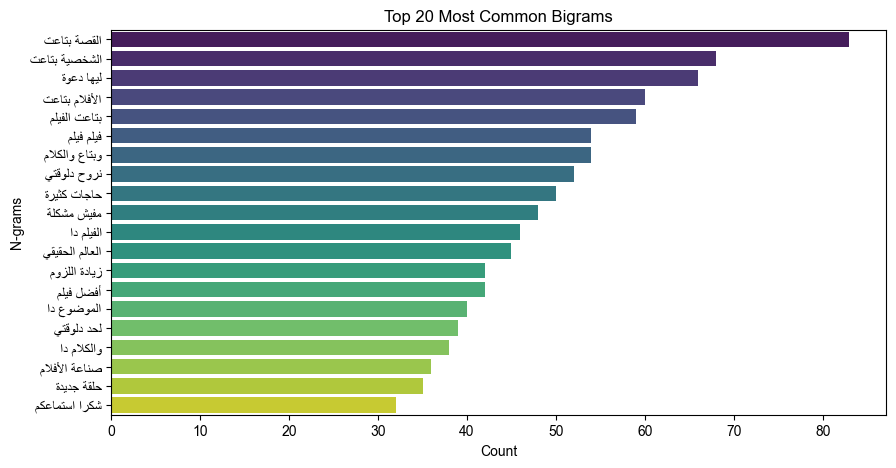

C:\Users\youss\AppData\Local\Temp\ipykernel_29304\1931906633.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngrams, palette='viridis')


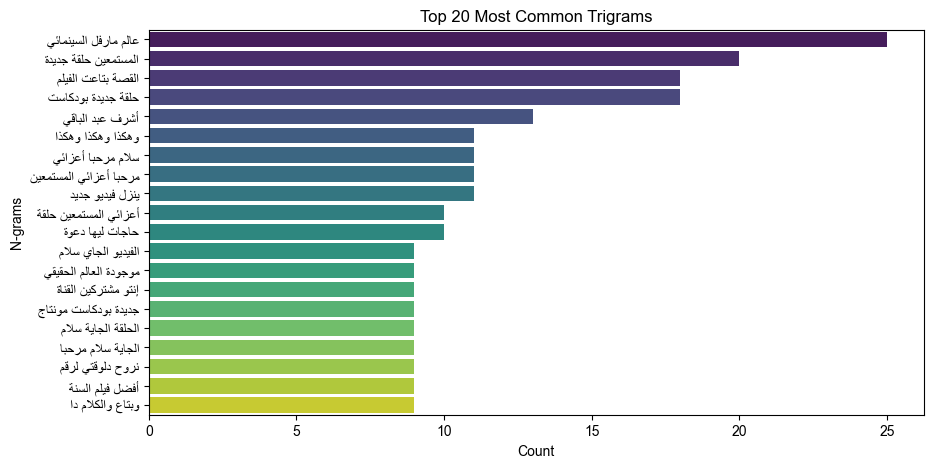

In [97]:
from arabic_reshaper import arabic_reshaper
from bidi import get_display
from nltk.stem.isri import ISRIStemmer

digits = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
import seaborn as sns
def tokenize_text(text):
    text = re.sub(r'\b\d{1,2}:\d{2}\b', '', text)
    text = text.lower()  
    text = re.sub(r'\d+', '', text)  
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = simple_word_tokenize(text, split_digits=True)
    tokens = [word for word in tokens if word not in punctuations]
    tokens = [re.sub(r'[^\w\s]', '', word) for word in tokens]
   # st = ISRIStemmer()
    #tokens= [st.suf32(word) for word in tokens]
    tokens = [word for word in tokens if word not in khatib_stopwords]
    tokens = [word for word in tokens if word not in nltk_stop_words]
    tokens = [word for word in tokens if word not in digits]
    return tokens



def extract_ngrams(tokens, n=2):
    return list(ngrams(tokens, n))

def get_common_ngrams(tokens, n=2, top_k=20):
    all_ngrams = extract_ngrams(tokens, n)
    ngram_counts = Counter(all_ngrams)
    return ngram_counts.most_common(top_k)

def tfidf_analysis(tokens, n=2):
    text = ' '.join(tokens)
    vectorizer = TfidfVectorizer(ngram_range=(n, n))
    X = vectorizer.fit_transform([text]) 

    feature_names = vectorizer.get_feature_names_out()
    scores = X.toarray().flatten() 

    tfidf_ranking = sorted(zip(feature_names, scores), key=lambda x: x[1], reverse=True)
    return tfidf_ranking[:20]

# if all transcripts are in one string
text = ' '.join(all_transcripts)
tokens = tokenize_text(text)

print("Top Bigrams (Most Common Phrases):")
print(get_common_ngrams(tokens, n=2))

print("\nTop Trigrams (Most Common Phrases):")
print(get_common_ngrams(tokens, n=3))

print("\nUnique Bigram Phrases using TF-IDF:")
print(tfidf_analysis(tokens, n=2))

def plot_ngrams(ngram_counts, title):
    ngrams, counts = zip(*ngram_counts)
    ngrams = [' '.join(ngram) for ngram in ngrams]
    ngrams = [get_display(arabic_reshaper.reshape(ngram)) for ngram in ngrams]  # Fix Arabic text display
    
    plt.figure(figsize=(10, 5))
    sns.barplot(x=counts, y=ngrams, palette='viridis')
    plt.xlabel("Count", fontname='Arial')
    plt.ylabel("N-grams", fontname='Arial')
    plt.title(title, fontname='Arial')
    plt.xticks(fontname='Arial')
    plt.yticks(fontname='Arial')
    plt.show()

# Plot most common bigrams
bigram_counts = get_common_ngrams(tokens, n=2)
plot_ngrams(bigram_counts, "Top 20 Most Common Bigrams")

# Plot most common trigrams
trigram_counts = get_common_ngrams(tokens, n=3)
plot_ngrams(trigram_counts, "Top 20 Most Common Trigrams")


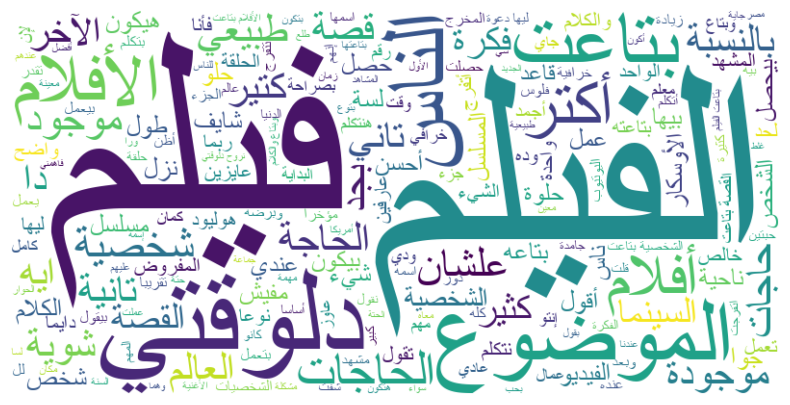

In [98]:
from arabic_reshaper import reshape
from bidi.algorithm import get_display

def generate_wordcloud(tokens):
    text = ' '.join(tokens)
    reshaped_text = reshape(text)
    bidi_text = get_display(reshaped_text)
    wordcloud = WordCloud(
        font_path='Arial.ttf',
        width=800, height=400,
        background_color='white'
    ).generate(bidi_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()



generate_wordcloud(tokens)

In [99]:
from camel_tools.sentiment import SentimentAnalyzer

sa = SentimentAnalyzer("CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment")
                       
sentiment_scores = [sa.predict(text) for text in all_transcripts]

print(f"Sentiment: {sentiment_scores}")

Sentiment: [['negative'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['negative'], ['neutral'], ['neutral'], ['negative'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['neutral'], ['positive']]


In [100]:
def lexical_diversity(text,tokens):
    unique_tokens = set(tokens)
    ttr = len(unique_tokens) / len(tokens) if tokens else 0
    return ttr

# Example Arabic text


# Calculate lexical diversity
ttr_score = lexical_diversity(text,tokens)

# Display result
reshaped_text = get_display(arabic_reshaper.reshape(f"Lexical Diversity (TTR): {ttr_score:.2f}"))
print(reshaped_text)


Lexical Diversity (TTR): 0.21


In [101]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from tashaphyne.stemming import ArabicLightStemmer
import arabic_reshaper
from bidi.algorithm import get_display


nltk.download('punkt')
nltk.download('punkt_tab')
# Arabic Light Stemmer to help with syllable estimation
stemmer = ArabicLightStemmer()

def count_syllables_arabic(word):
    vowels = "اويءة"
    return sum(1 for char in word if char in vowels)

def readability_analysis(text,tokens):
    sentences = sent_tokenize(text)
    words = tokens
    num_sentences = len(sentences)
    num_words = len(words)
    num_complex_words = sum(1 for word in words if count_syllables_arabic(word) >= 3)

    avg_sentence_length = num_words / num_sentences if num_sentences > 0 else 0
    percent_complex_words = (num_complex_words / num_words) * 100 if num_words > 0 else 0
    fog_index = 0.4 * (avg_sentence_length + percent_complex_words)
    
    return fog_index


fog_score = readability_analysis(text,tokens)

# Display result
reshaped_text = get_display(arabic_reshaper.reshape(f"Gunning Fog Index: {fog_score:.2f}"))
print(reshaped_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\youss\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\youss\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Gunning Fog Index: 14.23
